Code to generate the sketches for the phase diagrams (to be fixed later in Inkscape)

In [1]:
using PyPlot, Statistics, LaTeXStrings, PyCall, LinearAlgebra

In [90]:
ENV["PYTHON"] = "C:\\Users\\admin\\Anaconda3\\envs\\data_vis\\python.exe"

LogNorm = pyimport("matplotlib.colors").LogNorm
cmap = pyimport("cmap")

lajolla = cmap.Colormap("crameri:lajolla").to_mpl();
balance = cmap.Colormap("cmocean:balance").to_mpl();
oslo = cmap.Colormap("crameri:oslo").to_mpl();
lipari = cmap.Colormap("crameri:lipari").to_mpl();
eclipse = cmap.Colormap("cmasher:eclipse").to_mpl();
bilbao = cmap.Colormap("crameri:bilbao").to_mpl();


# Configure LaTeX rendering and fonts
PyPlot.matplotlib[:rc]("text", usetex=true)
PyPlot.matplotlib[:rc]("font", family="serif", serif=["mathpazo"], size=30)  # Base font size
PyPlot.matplotlib[:rc]("axes", titlesize=30)             # Axis title
PyPlot.matplotlib[:rc]("axes", labelsize=30)             # Axis labels
PyPlot.matplotlib[:rc]("xtick", labelsize=30)            # X-ticks
PyPlot.matplotlib[:rc]("ytick", labelsize=30)            # Y-ticks
PyPlot.matplotlib[:rc]("legend", fontsize=18)            # Legend
PyPlot.matplotlib[:rc]("figure", titlesize=24)           # Figure title
PyPlot.svg(true)
# LaTeX preamble packages
PyPlot.matplotlib[:rc]("text.latex", preamble="\\usepackage{amsmath}\\usepackage{amsfonts}\\usepackage{amssymb}\\usepackage{lmodern}")

Overview first figure: phase diagram schematic for spin 1/2 particle

In [91]:
cmap = lipari

# pick two sample points in [0,1]
t1, t2, t3 = 0.10,0.5, 0.75
color_t1  = cmap(t1)   
color_t2 = cmap(t2)
color_t3 = cmap(t3)    

(0.91206, 0.60614, 0.45414, 1.0)

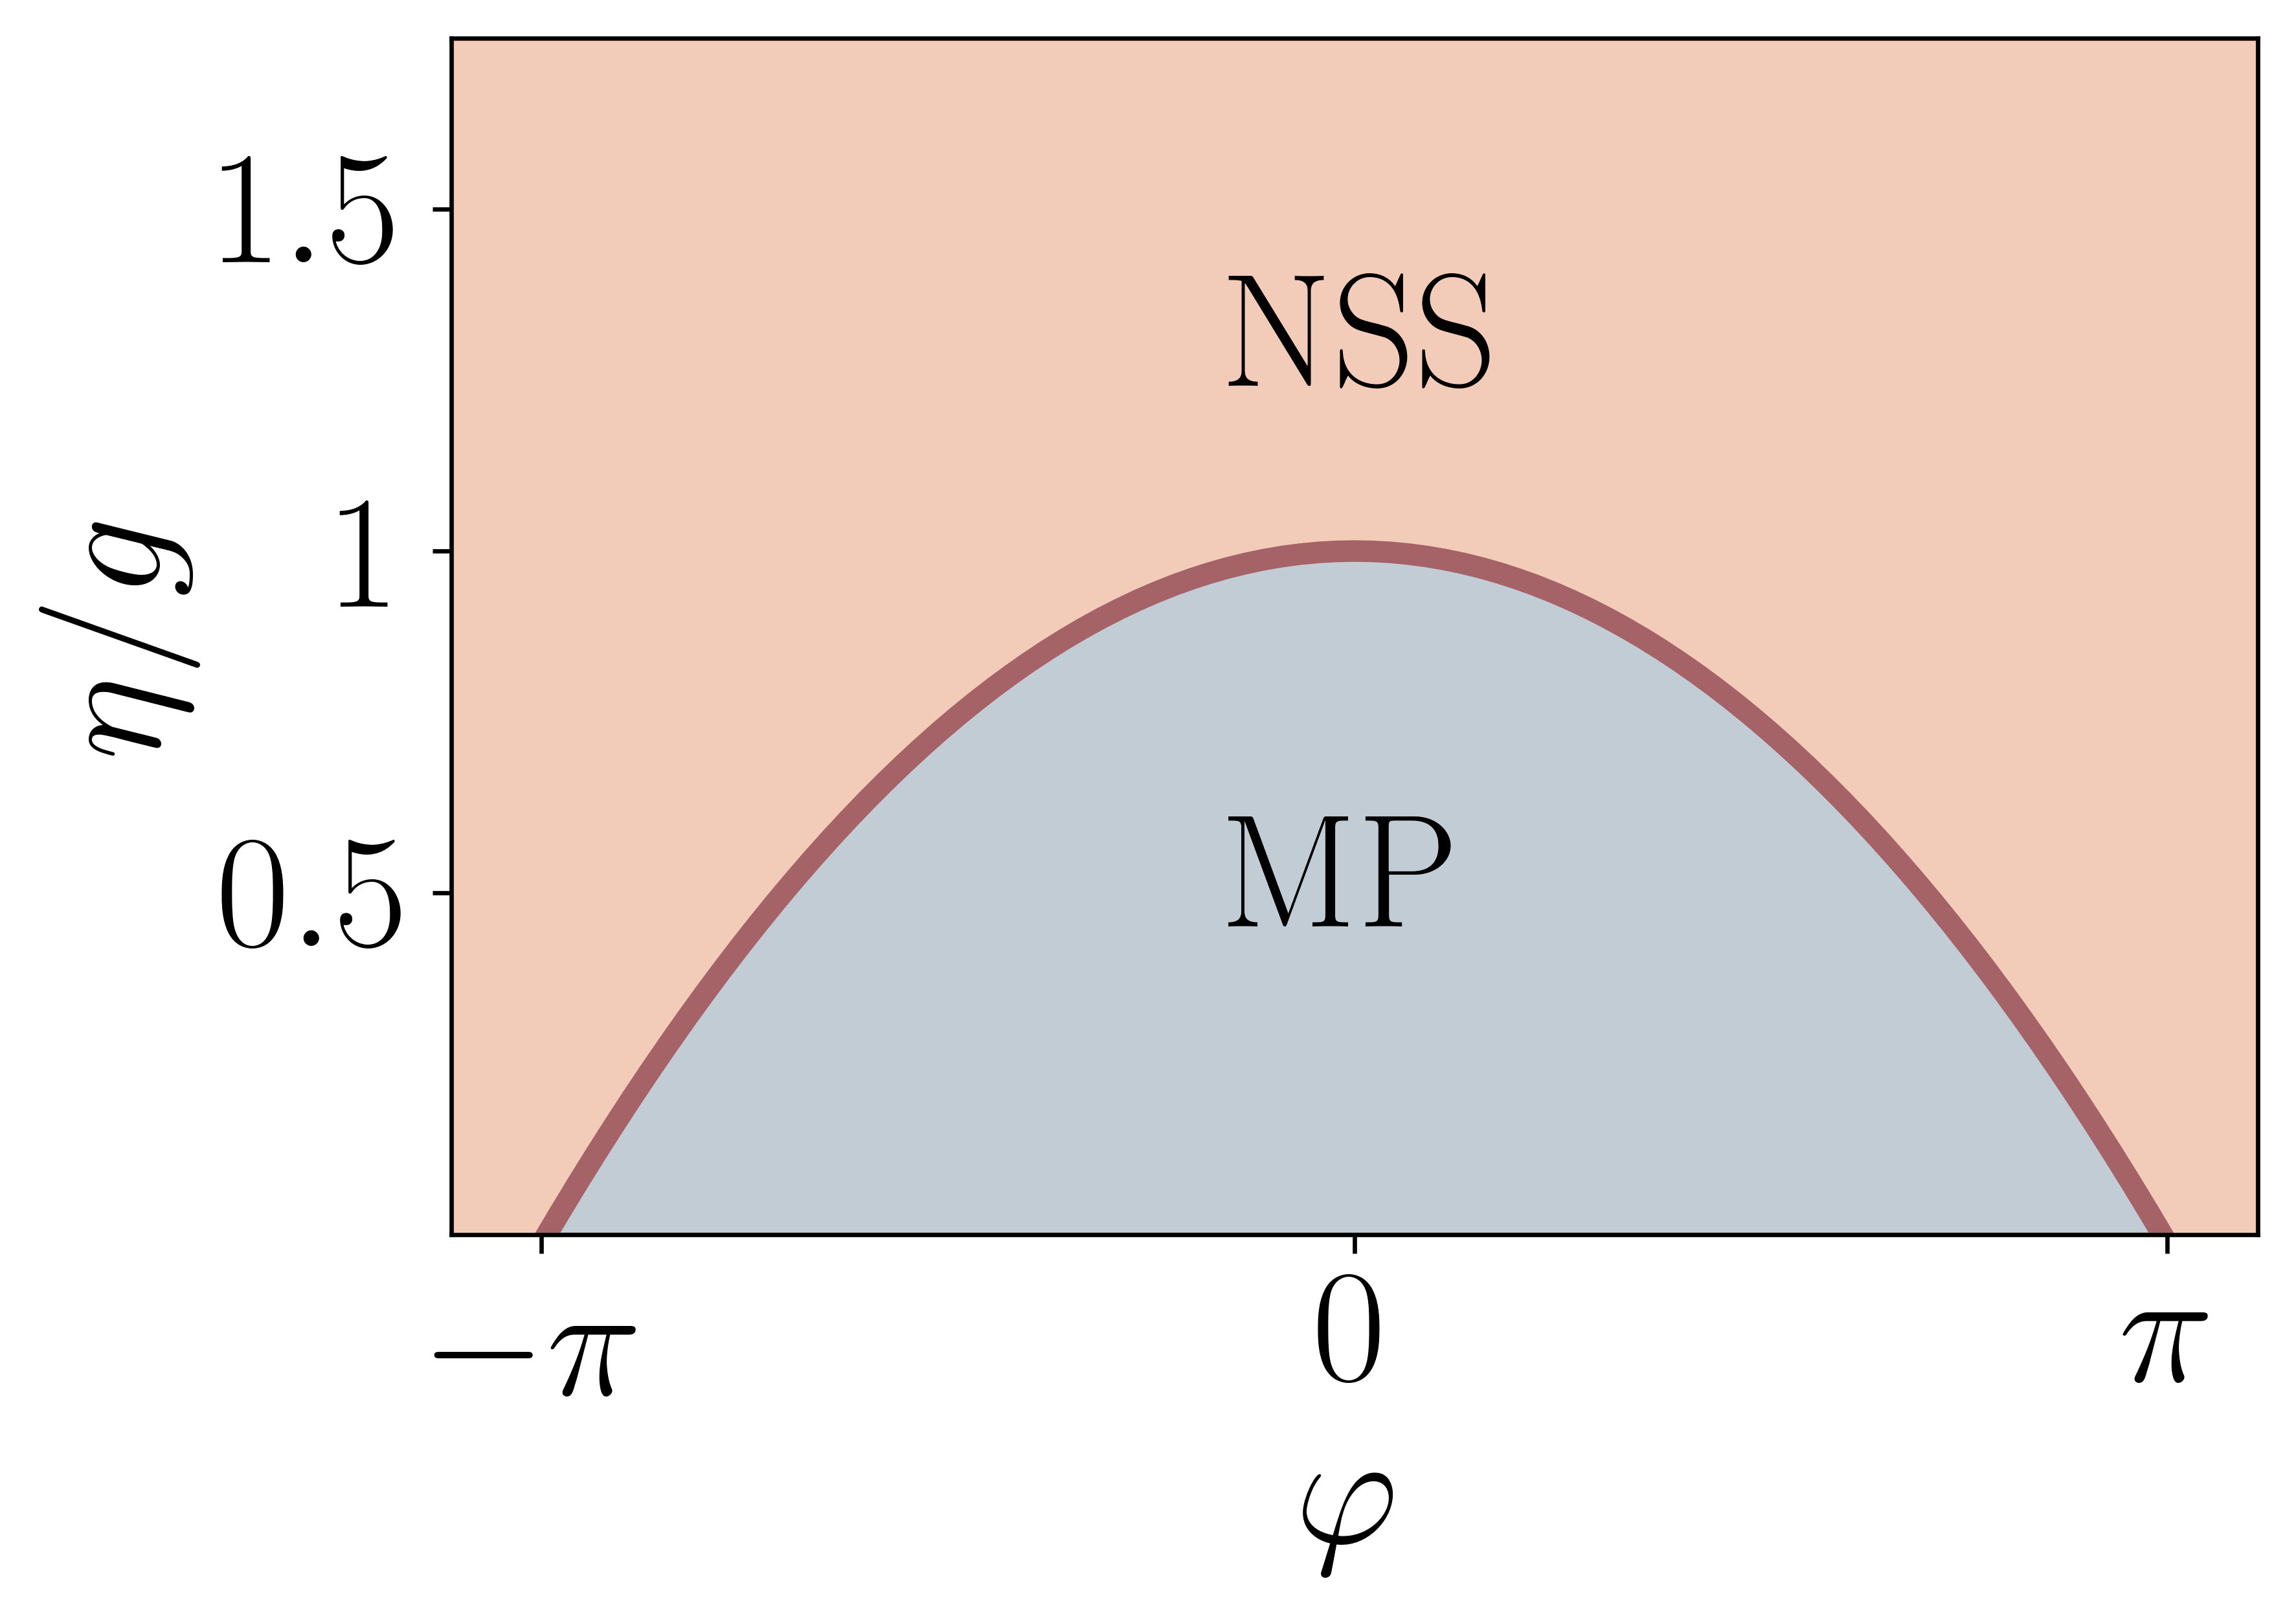

In [92]:
x = -0.5:0.01:0.5
f = -1 .* x.^2 
ymin = 0.2
ymax = 0.15

xtick_locs = [x[6], 0.0, x[end-5]]  # x = φ/π
xtick_labels = [L"-\pi", L"0",  L"\pi"]

ytick_locs = [-ymin/2, 0,ymin/2]  # x = φ/π
ytick_labels = [L"0.5", L"1", L"1.5"]


fig, ax = subplots(figsize=(6, 4),dpi=600)
ax.fill_between(
    x,
    f,              # upper curve
    -ymin,           # lower constant
    where = f .>= -ymin,    # only where f ≥ ymin
    color = color_t1,
    alpha = 0.25,
    interpolate = true
)
ax.fill_between(
    x, ymax, f;
    where       = f .<= ymax,
    color       = color_t3,   # pastel pink
    alpha       = 0.5,
    interpolate = true
)
ax.plot(x, f, lw=4, color=color_t2)
ax.set_ylabel(L"\eta/g")
ax.set_yticks(ytick_locs)
ax.set_yticklabels(ytick_labels)
ax.set_ylim(-0.2, 0.15)
ax.set_xticks(xtick_locs)
ax.set_xticklabels(xtick_labels)
ax.set_xlabel(L"\varphi")
ax.text(0.43, 0.35, "MP", transform=ax.transAxes, fontsize=30, fontweight="bold", va="top", ha="left")
ax.text(0.43, 0.80, "NSS", transform=ax.transAxes, fontsize=30, fontweight="bold", va="top", ha="left")
ax.set_xlim(-0.5, 0.5)
display(fig)

fig.savefig("fig1_1.svg", bbox_inches="tight", pad_inches=0.1, transparent=true)

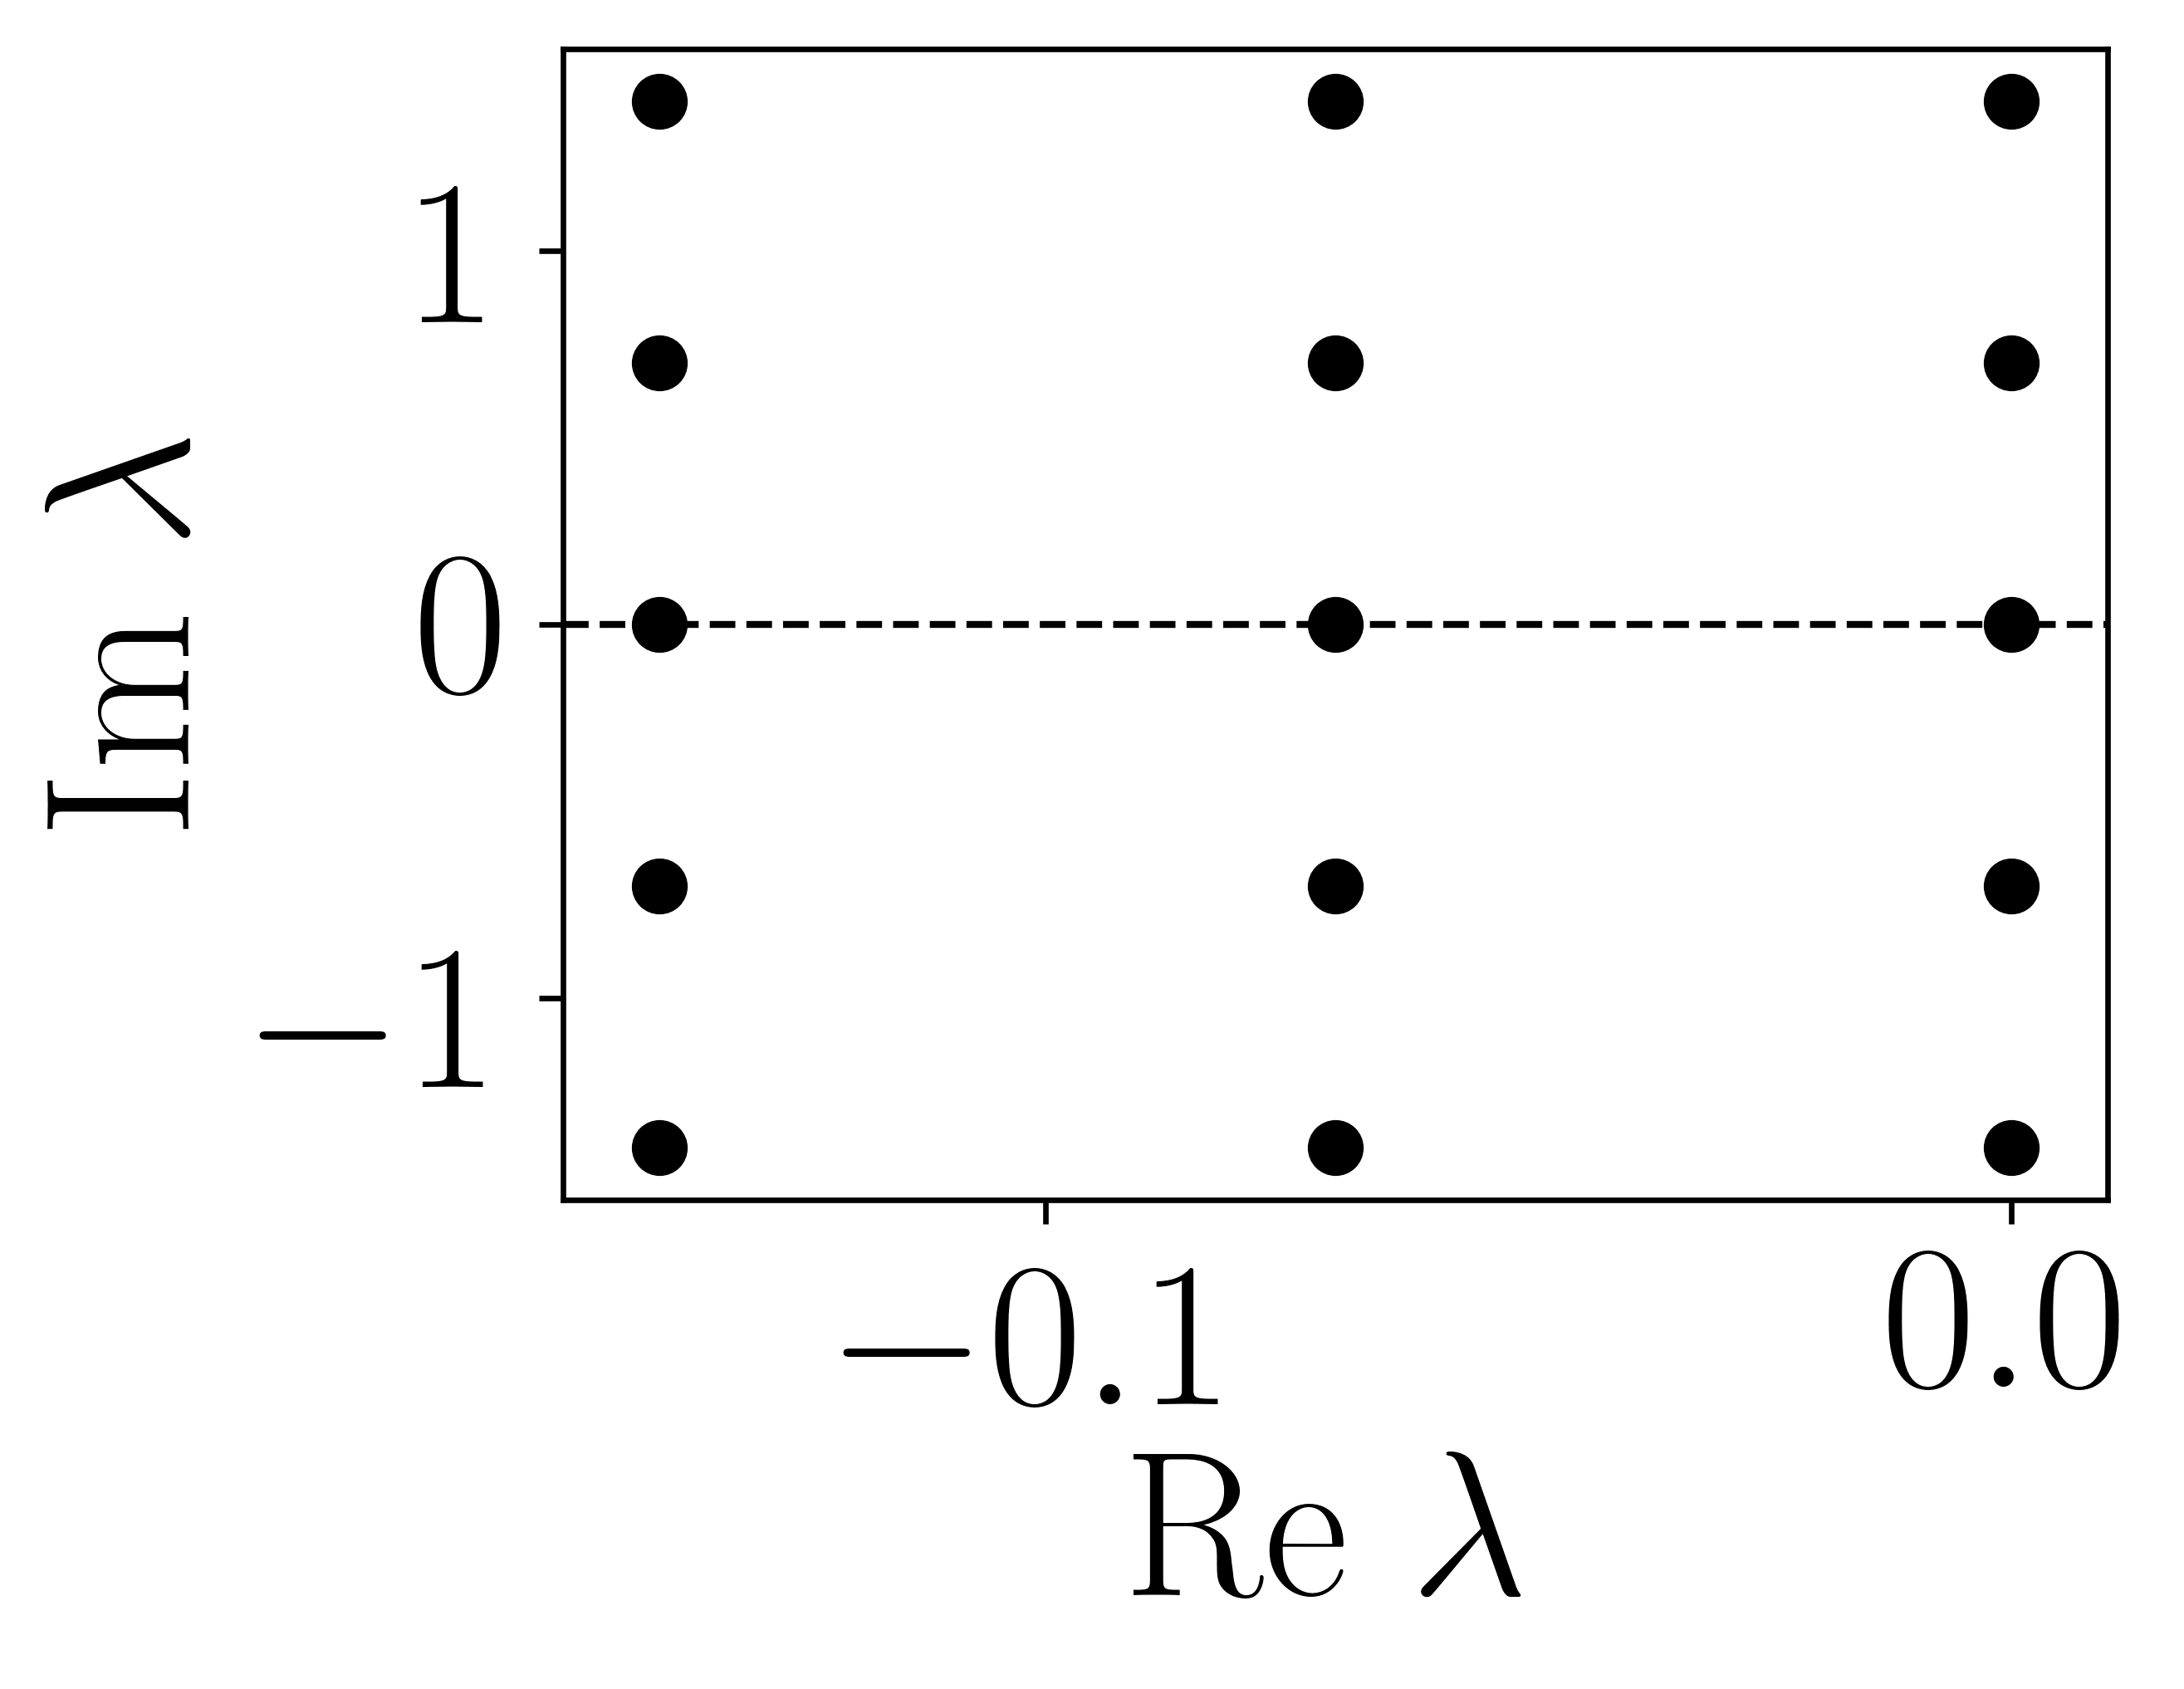

In [ ]:
# Define a list of 5 complex eigenvalues (Liouvillian spectrum example)
λ = [0.0 + 0.0im, 0 + 0.7im, 0 - 0.7im, -0.07 + 0.0im, -0.07 + 0.7im, -0.07 - 0.7im, -0.14 + 0.7im, -0.14 - 0.7im, -0.14 + 0.0im, -0.14 + 1.4im, -0.14 - 1.4im,-0 + 1.4im, 0 - 1.4im,-0.07 + 1.4im, -0.07 - 1.4im]



# Extract real and imaginary parts
x = real.(λ)
y = imag.(λ)



fig, ax = subplots(figsize=(4, 3),dpi=600)
# Scatter plot
scatter(x, y, color="black", marker="o", s=50)
ax.axhline(0, color="black", lw=1, ls="--")
xlabel(L"Re $\lambda$")
ylabel(L"Im $\lambda$")
xlim(-0.15,0.01)
display(fig)
# fig.savefig("fig1_2.svg", bbox_inches="tight", pad_inches=0.1)

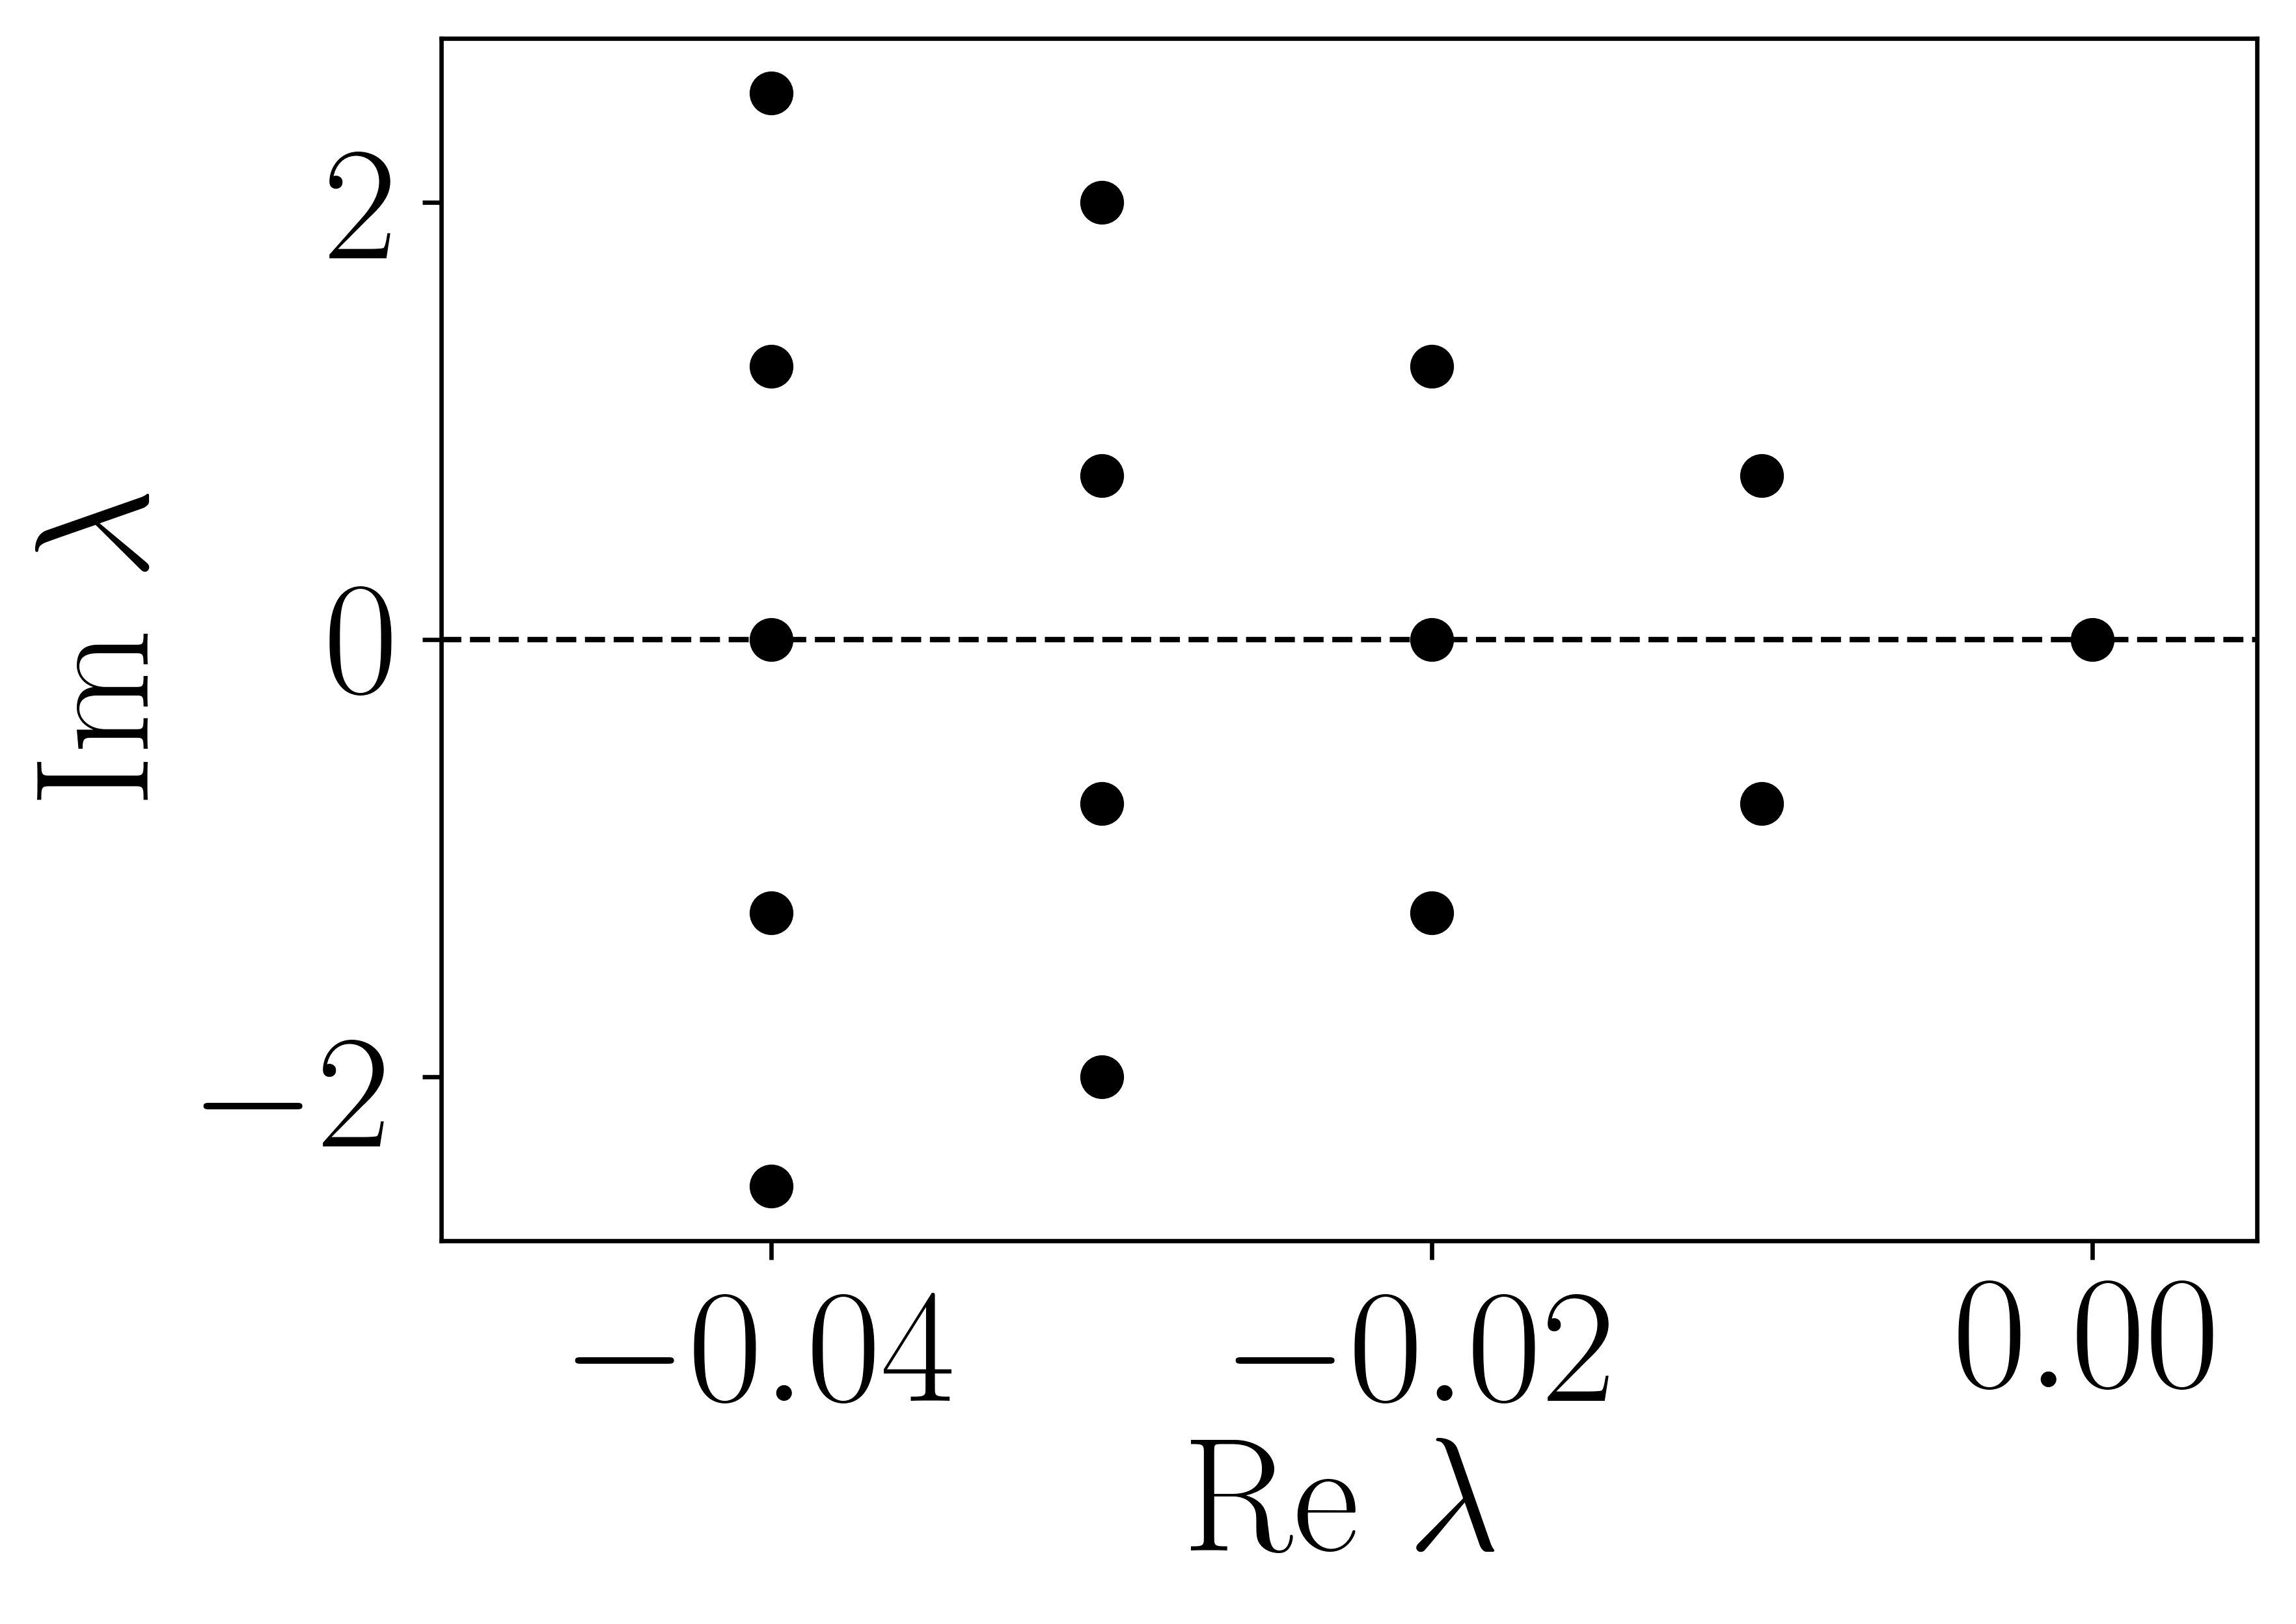

In [150]:
λ = [
    # 5 points at Re = -0.04
    -0.04 + 2.5im,  -0.04 + 1.25im,  -0.04 + 0.0im,  -0.04 - 1.25im,  -0.04 - 2.5im,
    # 4 points at Re = -0.03
    -0.03 + 2.0im,  -0.03 + 0.75im,  -0.03 - 0.75im,  -0.03 - 2.0im,
    # 3 points at Re = -0.02
    -0.02 + 1.25im, -0.02 + 0.0im,   -0.02 - 1.25im,
    # 2 points at Re = -0.01
    -0.01 + 0.75im, -0.01 - 0.75im,
    # 1 point at Re = 0.0
    0.0   + 0.0im
]

x = real.(λ)
y = imag.(λ)

fig, ax = subplots(figsize=(6, 4),dpi=600)
ax.scatter(x, y, marker="o", color="black", s=50)
ax.axhline(0, color="black", lw=1, ls="--")
xlabel(L"Re $\lambda$")
ylabel(L"Im $\lambda$")
xlim(-0.05,0.005)

fig.savefig("fig1_3.svg", bbox_inches="tight", pad_inches=0.1)
display(fig)